## Импорт библиотек

In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas

from sklearn.datasets import fetch_openml # функция библиотеки scikit-learn для загрузки данных с сайта OpenML

from sklearn.decomposition import PCA # Метод главных компонент от мира scikit-learn


from sklearn.preprocessing import StandardScaler # Стандартизация от мира scikit-learn

import plotly.express as px # yet another 3-D рисовалка
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error
from sklearn.linear_model import LassoCV, RidgeCV

In [ ]:
plt.style.use("_classic_test_patch")

сегодня будем использовать классические графики

In [ ]:
df =  pd.read_csv('/content/bikes_rent.csv')

In [ ]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


In [ ]:
df['cnt']

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

целевая переменная - цена аренды велосипеда

In [ ]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


##Линейная регрессия

In [ ]:
X = df.drop(["cnt"], axis = 1)
y = df["cnt"]
X


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372


In [ ]:
X.shape, y.shape

((731, 12), (731,))

In [ ]:
X_scal = StandardScaler().fit_transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scal, y,
        test_size = 0.3, random_state=42)

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = linreg.predict(x_test)

In [ ]:
y_pred.shape

(220,)

In [ ]:
items = (('max:', max_error(y_test, y_pred)),
         ('mae:', mean_absolute_error(y_test, y_pred)),
         ('r^2:', r2_score(y_test, y_pred)),
         ('rmse:', np.sqrt(mean_squared_error(y_test, y_pred))))
for item in items:
  print('{0:8} {1:.4f}'.format(item[0], item[1]))

max:     4123.4871
mae:     638.6485
r^2:     0.8113
rmse:    866.4989


Ничего нового - вполне нормальные метрики, попробуем реализовать то же самое, только будем использовать данные после МГК

## Метод Главных Компонент

In [ ]:
DF_scaled = df.drop(["cnt"], axis = 1).copy() # чтобы не портить исходный датафрейм - складываем копию датафрейма в новый датафрейм

In [ ]:
full_dimensions = [col for col in DF_scaled.columns]
print(full_dimensions)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']


In [ ]:
DF_scaled

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372


In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(DF_scaled)
X_scaled = pd.DataFrame(X_scaled, columns=full_dimensions)

Стандартизируем данные и засовываем все это в пандасовский датафрейм

In [ ]:
X_scaled

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
0,-1.348213,-1.001369,-1.600161,-0.171981,1.498809,-1.471225,1.110427,-0.826662,-0.679946,1.250171,-0.387892,-0.387892
1,-1.348213,-1.001369,-1.600161,-0.171981,-1.496077,-1.471225,1.110427,-0.721095,-0.740652,0.479113,0.749602,0.749602
2,-1.348213,-1.001369,-1.600161,-0.171981,-0.996930,0.679706,-0.726048,-1.634657,-1.749767,-1.339274,0.746632,0.746632
3,-1.348213,-1.001369,-1.600161,-0.171981,-0.497782,0.679706,-0.726048,-1.614780,-1.610270,-0.263182,-0.389829,-0.389829
4,-1.348213,-1.001369,-1.600161,-0.171981,0.001366,0.679706,-0.726048,-1.467414,-1.504971,-1.341494,-0.046307,-0.046307
...,...,...,...,...,...,...,...,...,...,...,...,...
726,-1.348213,0.998633,1.588660,-0.171981,0.500513,0.679706,1.110427,-1.318665,-1.521108,0.175807,2.061426,2.061426
727,-1.348213,0.998633,1.588660,-0.171981,0.999661,0.679706,1.110427,-1.323224,-1.346690,-0.266238,-0.452131,-0.452131
728,-1.348213,0.998633,1.588660,-0.171981,1.498809,-1.471225,1.110427,-1.323224,-1.424344,0.878392,-0.853552,-0.853552
729,-1.348213,0.998633,1.588660,-0.171981,-1.496077,-1.471225,-0.726048,-1.309558,-1.490049,-1.015664,2.069444,2.069444


In [ ]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(X_scaled)
pca.shape

(731, 5)

Допустим возьмем 5 главных компонент и посмотрим чего там происходит

In [ ]:
pcamodel.explained_variance_

array([2.9665177 , 1.77096196, 1.5562424 , 1.3364951 , 1.20437704])

In [ ]:
pcamodel.explained_variance_ratio_

array([0.24687163, 0.14737828, 0.12950946, 0.11122223, 0.10022746])

In [ ]:
print(sum(pcamodel.explained_variance_ratio_))

0.7352090485600182


5 главных компонент показывают 74 процента информации

## Небольшой анализ

Text(0.5, 0, 'Components')

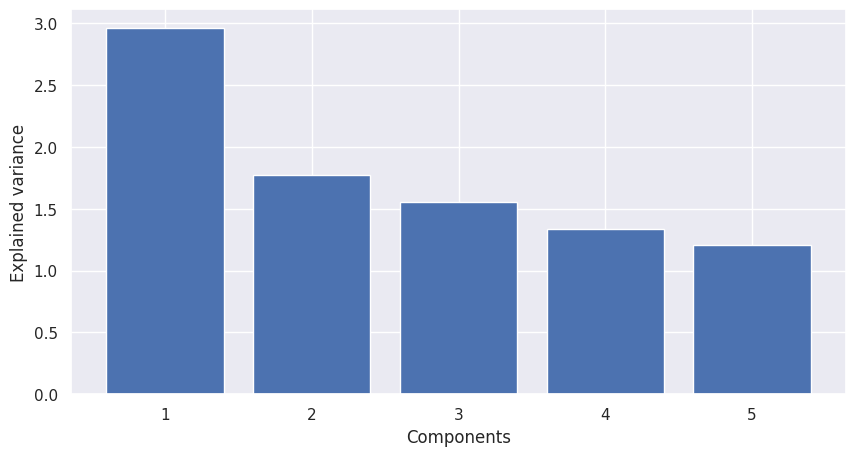

In [ ]:
sns.set(rc={"figure.figsize": (10, 5)})
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')


Величина дисперсии, объясняемая каждым из выбранных компонентов, видно, что компонента под номером один имеет большую велечину дисперсии

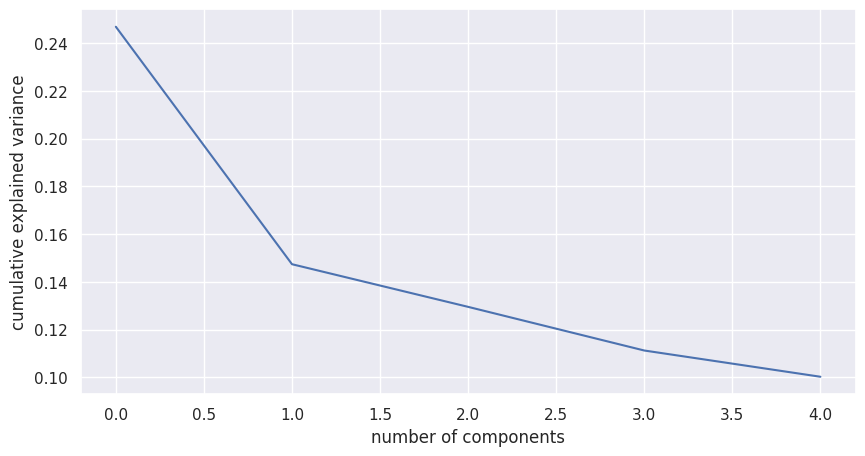

In [ ]:
sns.set(rc={"figure.figsize": (10, 5)})
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

процент дисперсии, объясняемый каждым из выбранных компонентов.

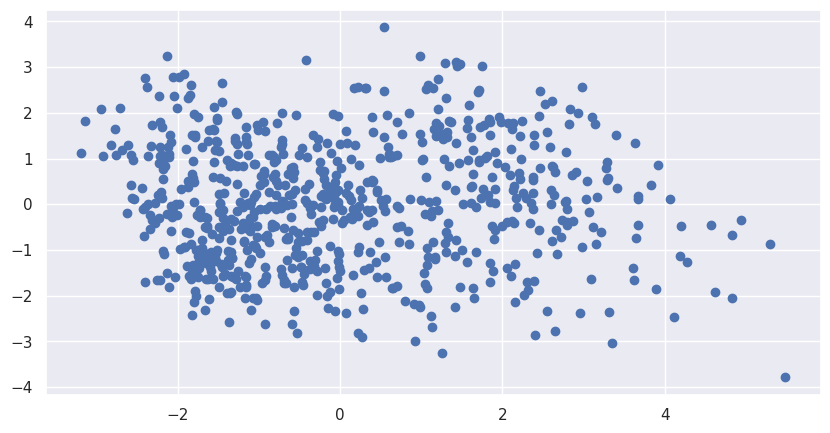

In [ ]:
sns.set(rc={"figure.figsize": (10, 5)})
plt.scatter(pca[:, 0], pca[:, 1])

Визуализируем пространство главных компонент

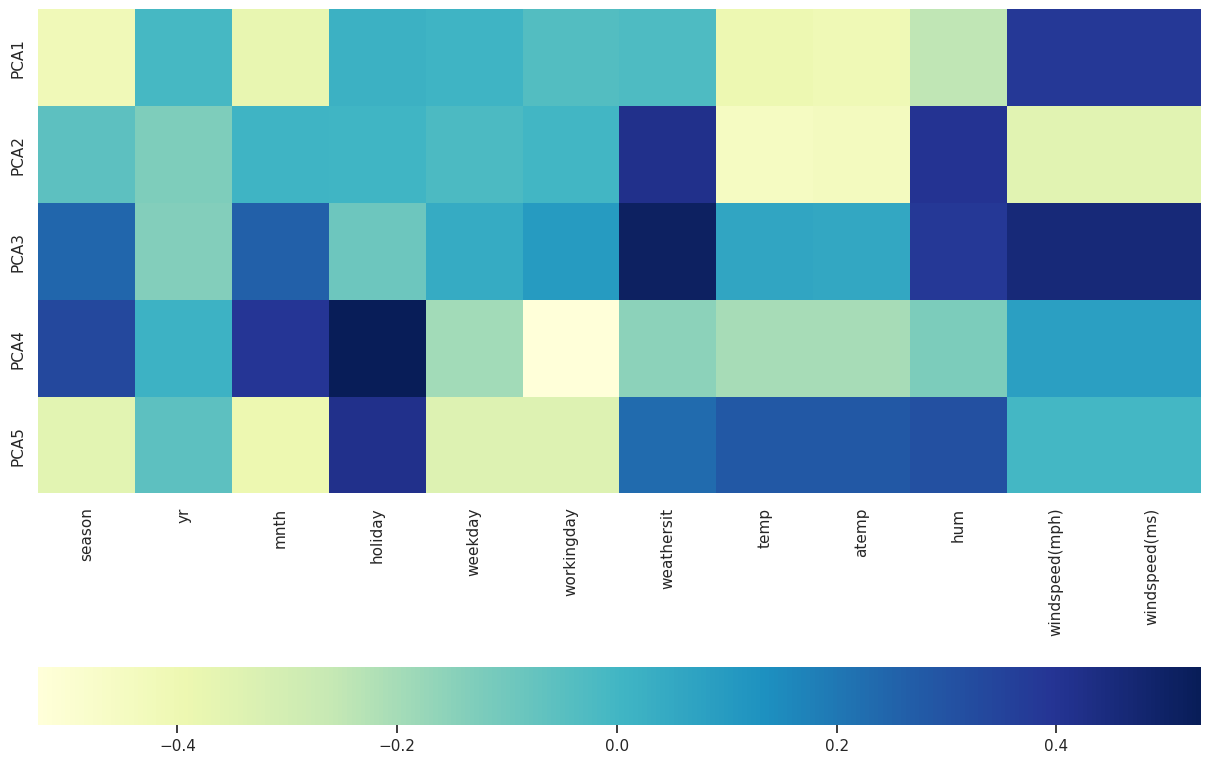

In [ ]:
sns.set(rc={"figure.figsize": (15, 15)})
ax = sns.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(X_scaled.columns),
                 cbar_kws={"orientation": "horizontal"})

ax.set_aspect("equal")


По данному графику можно понять, что с первой главной компонентой связана скорость ветра (windspeed), со второй благоприятность погоды (weathersid), и туманность (hum)

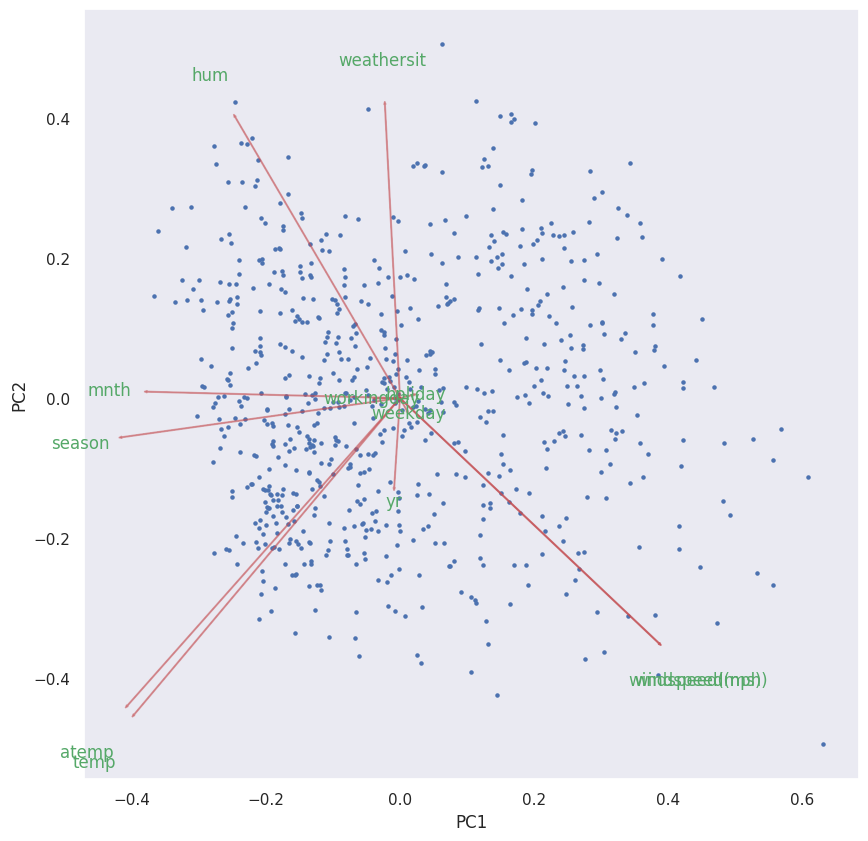

In [ ]:
sns.set(rc={"figure.figsize": (10, 10)})
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:3, :]),list(X_scaled.columns))
plt.show()

Опять же на этом графике можно посмотреть, какие признаки связаны с первой и второй компонентами, так же чем ближе признаки тем больше они кореллируют

(array([4., 0., 0., 0., 3., 0., 0., 1., 3., 1.]),
 array([-0.39392928, -0.31264574, -0.23136221, -0.15007867, -0.06879514,
         0.01248839,  0.09377193,  0.17505546,  0.256339  ,  0.33762253,
         0.41890607]),
 <BarContainer object of 10 artists>)

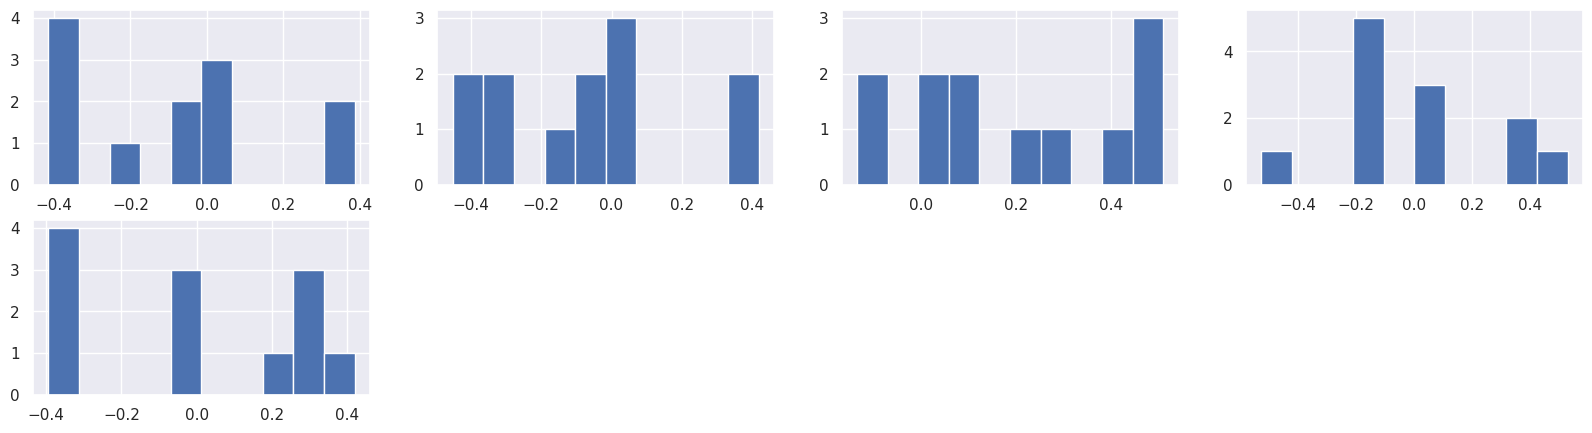

In [ ]:
ig = plt.figure(figsize = (20,5))

plt.subplot(241)
plt.hist(pcamodel.components_[0,:],color='b')

plt.subplot(242)
plt.hist(pcamodel.components_[1,:],color='b')

plt.subplot(243)
plt.hist(pcamodel.components_[2,:],color='b')

plt.subplot(244)
plt.hist(pcamodel.components_[3,:],color='b')

plt.subplot(245)
plt.hist(pcamodel.components_[4,:],color='b')

А тут метод главных компонент сам понял какие данные важные, а какие нет

## Засунем пространство компонент в линейную регрессию

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pca, y, test_size = 0.3)

In [ ]:
linreg_pca = LinearRegression()

In [ ]:
linreg_pca.fit(x_train_pca, y_train_pca)

LinearRegression()

In [ ]:
y_pred_pca = linreg_pca.predict(x_test_pca)

In [ ]:
y_pred.shape

(220,)

In [ ]:
items = (('max:', max_error(y_test_pca, y_pred_pca)),
         ('mae:', mean_absolute_error(y_test_pca, y_pred_pca)),
         ('r^2:', r2_score(y_test_pca, y_pred_pca)),
         ('rmse:', np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))))
for item in items:
  print('{0:8} {1:.4f}'.format(item[0], item[1]))

max:     4203.4063
mae:     1115.8650
r^2:     0.5652
rmse:    1326.7732


Ну и по итогу такая модель получилась тоже вполне сносной, по сравнению с обычными данными, а значит от некоторых признаков можно и отказаться от weekday, например